In [1]:
## Exercise with the wine dataset from sklearn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB


In [12]:
#load the data
dataset = load_wine()
data = pd.DataFrame(dataset.data)
data.columns = dataset.feature_names

In [13]:
# Create a target column with the dataset target
data['target'] = dataset.target

In [14]:
# print the target_names
dataset.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [15]:
# print the first 5 rows of the dataset
data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [16]:
#make sure that the columns have the correct label
data.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'target'],
      dtype='object')

In [17]:
#print the shape of the dataset
data.shape

(178, 14)

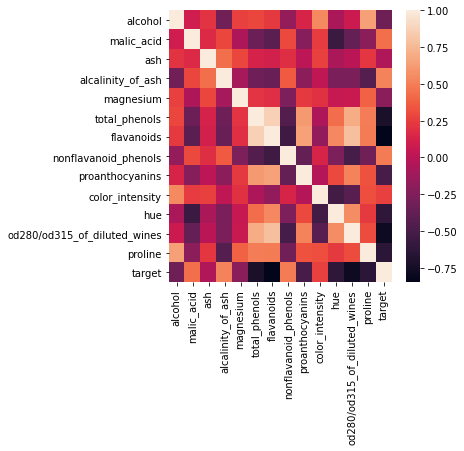

In [18]:
#evaluate features for correlations
plt.figure(figsize=(5,5))
sns.heatmap(data.corr())
plt.show()

In [29]:
#choose features from heat plot
features = ['alcalinity_of_ash', 'total_phenols', 'flavanoids', 'hue', 'proline', 'od280/od315_of_diluted_wines']

In [30]:
#set X to features and y to target
X = data[features]
y= data['target']
print(X)
print(y)

     alcalinity_of_ash  total_phenols  flavanoids   hue  proline  \
0                 15.6           2.80        3.06  1.04   1065.0   
1                 11.2           2.65        2.76  1.05   1050.0   
2                 18.6           2.80        3.24  1.03   1185.0   
3                 16.8           3.85        3.49  0.86   1480.0   
4                 21.0           2.80        2.69  1.04    735.0   
..                 ...            ...         ...   ...      ...   
173               20.5           1.68        0.61  0.64    740.0   
174               23.0           1.80        0.75  0.70    750.0   
175               20.0           1.59        0.69  0.59    835.0   
176               20.0           1.65        0.68  0.60    840.0   
177               24.5           2.05        0.76  0.61    560.0   

     od280/od315_of_diluted_wines  
0                            3.92  
1                            3.40  
2                            3.17  
3                            3.45  
4  

In [31]:
#split train and test data with 80/20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=73)

In [35]:
#normalize fetures
scaler_train = StandardScaler()
X_train = scaler.fit_transform(X_train)

scaler_test = StandardScaler
X_test = scaler.fit_transform(X_test)

In [36]:
#Now, we classify with a Random forest
rfc = RandomForestClassifier(random_state=99)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=99)

In [37]:
print('Training Score: {}'.format(rfc.score(X_train, y_train)))
print('Testing Score: {}'.format(rfc.score(X_test, y_test)))

Training Score: 1.0
Testing Score: 0.9444444444444444


## Pretty good, huh? 
- What if we want to use another [classifier from sklearn](https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html)?

In [39]:
########################################################
########################################################
#K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [40]:
print('Training Score: {}'.format(knn.score(X_train, y_train)))
print('Testing Score: {}'.format(knn.score(X_test, y_test)))

Training Score: 0.9436619718309859
Testing Score: 0.9722222222222222


In [41]:
########################################################
########################################################
#Support vector machines
svc = SVC(random_state=99)
svc.fit(X_train, y_train)

SVC(random_state=99)

In [43]:
print('Training Score: {}'.format(svc.score(X_train, y_train)))
print('Testing Score: {}'.format(svc.score(X_test, y_test)))

Training Score: 0.9788732394366197
Testing Score: 0.9166666666666666


In [49]:
########################################################
########################################################
#Naive Bayes Guassian
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [67]:
print('Training Score: {}'.format(gnb.score(X_train, y_train)))
print('Testing Score: {}'.format(gnb.score(X_test, y_test)))

Training Score: 0.9577464788732394
Testing Score: 0.9444444444444444
